# Tarea 3

* Sofía Cruz T. (**@cutsof**)
* Daniel Martínez U. (**@danmarurr**)

**Ejercicio 1:** 

Consideren el mapeo $F(x) = x^2-2$ definido en el intervalo $[-2,2]$. ¿Qué podemos concluir después de muchos iterados para las condiciones iniciales $x_0=0$, $x_0=0.1$, $x_0=0.001$?


Quisimos hacer una animación para ver cḿoo se va llenando la parábola con los puntos. Así que primero usamos `PyPlot` y `matplotlib.animation`, con ayuda de código vito en clase de Sanders para animar :) . 

In [1]:
using PyPlot
using PyCall
@pyimport matplotlib.animation as anim  

In [6]:
L"""
`sqr_mapeos` calcula el mapeo de $F(x)=x^2 -2$ en el intervalo $[-2,2]$ a partir de una semmilla `x`
, haciendo `n` iteraciones. Regresa dos vectores, `xpath` y `ypath`, los cuales, juntos indican las 
coordenadas del punto resultante después de cada iteración.
"""

function sqr_mapeos(x::Float64,n::Int)
    xpath=Float64[x]        #semilla en primera coordenada
    ypath=Float64[0.0]      #coordenada arbitraria
    for i in 1:n
        push!(xpath,x)      #valor n-1 va a x
        x = x^2 -2          #se realiza F(x)
        push!(ypath,x)      #valor n va a y
        
    end
    return xpath,ypath
    
end

sqr_mapeos (generic function with 1 method)

In [3]:
"""
`anima_plot` Resliza la animación de cómo se desenvuelven las coordenadas obtenidas por el mapeo.
"""
function anima_plot(x,y, nombre::ASCIIString)
    fig = figure(figsize=(4,4))
    cuadros = [[plot(x[1:i],y[1:i],".",color="b")] for i=1:5:length(y)]
    
    animacion = anim.ArtistAnimation(fig, cuadros, interval=200, blit=true) 
    animacion[:save](nombre*".mp4", extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])
end

"""
`muestra_animacion` muestra la animación creada en `anima_plot`
"""
function muestra_animacion(nombre::ASCIIString)
    display("text/html", string("""<video autoplay controls><source src="data:video/x-m4v;base64,""",base64(open(readbytes,nombre*".mp4")),"""" type="video/mp4"></video>"""))
end

muestra_animacion (generic function with 1 method)

In [8]:
#Se obtienen los mapeos de 500 iteraciones para las semillas 0.0,0.1 y 0.001
x0,y0=sqr_mapeos(0.0,500)
x01,y01=sqr_mapeos(0.1,500)
x0001,y0001=sqr_mapeos(0.001,500);

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAAIOBtZGF0AAACrQYF//+p3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0OCByMjY0MyA1YzY1NzA0IC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTYgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAABWbZYiEABT//vfHT8Cm6Plmy51FPSEwitj6SCi9WOzQMnUAAAMACAdRwdEGsSqt39gAMzgwsZ1mI6nwAEPWFTtH3pBjAVaf2SDeWvGg2Xk1KxmFp7d8nMlSX1BZozKBHUE5qBWTCaL+pImRLIN/aFoxGTwHsvdjByH1fdxOr4DhA/9a/wwKeOd4t6ADGxf///+CnhHkpF91UdjF4L3fH2IqgdxTSHjwy72/21gdL6CmkBkNo4Lq0E1jd/GhP8aOHbQ1X5cCee2+tl9ctCvfy0xM0cwVkk59JojO2xLyTESdyjyz+LcTz+PYhNRMPazwYvGnc3DAfMhgVjafIvNRyIgcOzNPNNsR3Vu5Ta+qm2vPBWf4EPn0OFv5WMT1R4qomSQ8eCJemyCmwKT1zv6CikZEPqDt//m+7tWb/jHizf71BXu32+4cVUP1RpXB0gtDYaclafmWYffC/ZQ4ZRSmjiz19lUNw2boShZaJsSx2S5KdhM3HN6EgLem/CXraSHw45sEKw6RP5TA43Wcpf4c9gVgGL/GLF+XR/fSLVwytaG5vaNG+HfpoakC9pDHhkQDLJFHoEiIGqNEq4DnTqgjgIKIIFk8HcMrFoeV6CWlTzN/Sy9SxYnJebPESsaWGXfKxDxznDyN2ez749LrZS+1KLspBrdjRghxvuzpzjYSjHtxwj29A3Hn2y7O60YzulYHh5zEk/QomAbQixm92ei1EIVw2zx+uCIobiT0+fIMoYLicTfD0+nBWPgaIaRVpGn3Lhieo/2sJXBsWi+aQR4gHOjEaYiNP/ca5qH6hSPX4DIkkRi8HEfwQNbiYyCIuuXOD4DN5/EuXwBMnMetxUQwual/CRqDXd8eHDejYklUodxZNbbLGN/ib9UyKdiF9YZMqSO1RHQmukNtDBUAAEnhX6jq9e8h3BNzAJ9zKKmk1qyXWRCac0qqigRpsrhgHtx++hOM8NZgOyad+jhoAi/6cMZMjHiyuXUZCDkWxkBNdyYlTjXuquji4q0sA+kQEsOTiX4ZNuhl8t3F4dtGxGJToQFPTNMRXyfHJISeCRltfxSU63OhcqgQCV1qtH1sOBfjWqUFhEJq6wSrJiCoc7PqVlaKLDHSEe//6N2C0WVsJzi3UIae1JACAUB7i/uKsM8OYXtgKTG6n0pwi5Cm6wxF7rphSmoYmTMsv2n3xjFbTPy5LO7cUizoWYOPZs+TeQzOHjYDyc7b1hp+fF3O9o08+TVitfU8QNGtx8kR8bxE9o/IMQChU3LIgQxeeM6HEZ6YGkBp683vdb/Hx7e25zcPG6Z/QyAX9Xq/rpWEtapGZ/trbcqW9aqHnnxcwG/lvDmlIAeSFpTxL43gwrMjfDjn3hZJ7faB3Nrb1dPRfJY65DMngw0zcfQEJcyKHWEfXbgbRQmQfPuTBHZ7Tt9Yv0bj0zqN0CccbeMgXxJcOmnYokx+6f7n/iKZbhv6K9E+CzvoL/sPR/gQixJy8jo4PGZHXw//cZtvtTrW+TPorNWkFaFVwUQjw7Op8TU/NGCXkb2HuO/dzqBKJl8yHEZ+bngdesxMXpMyCvwAlAE4/XMuHn699qz435efswFNZ9p5PVTzaW+w0uE1IAHt+rlf7mc4ea92fOpqtEb+ORjHx8yTvKZefpd7kdmC1cAe7C/+smVzD5HsOzTFb9QQmPXTF8Si8k8UgGAXpBaNb69IgcKJhP7pSndC4Wp5lrSCX+bO6CMeaggR42gfDjK1qgzsYXvNWb00T7lfCwDq69S3d/exnpJ0ZoQrfx+T05KqlB6Y46rjJGj5Nh4gwfv5WbQ9BL2GGOdHqHNtZHXWqSXsV924ic/hL1XSGQ7q9oVvDP274P++XKOPIrFxLQHQNLC/2drbKWgysL6d4tptN3Rdn7Fc1RRhrL0UnlyCDRIzsQyPpTEzyih+rGC/oDs3j1oqMhZf//MBCjP85oxPSRp8nXP8cWIZvQp6z21ezee51TjSoiLz92jDoC1z8laLu5JEIvVPQsErsIEaDJLg8m4jRzOcXsNID1gSyA9O1T4tGlWO6tHxqRKc4UOSZLN7DTXfUhj5DHuZKdaiJrRKIpG/aSckb7aKAdGYkOBJDaHOXbAYc8IeIvBWBNHogQsuFTaCaqLjPwv3cSfstPfNn4Nsril5AdlX34VpqlwHv7kM5WS0XezgwQJtLHZ4MihKjZqH5ELdI5OJ4wCU9d0IZCMe7R5AQu+tk3zsgV6H4FhzophsE/E8SyrmYSJ4Tdp3cFgfyDFvrSwIyYuCiDMyejxf3Hrb/CxRE+wvSqzYmiBWlbi/OEq35Zte+oqineNPUC9/ml/1SEi52T09eYaZjooveP//1tvzikb/2zdymbNqGnhUAW3kFyLXreonAwVvs2Fphlrlq6wcXnLX3dJVJBmoKFhaXEYCRZMxoPfsFw9pbmtTwhfoMYQazumq5v2XeuB1kiWfaUFNB5FIm+7Krpc6e8Ktb+CII0IEHDqPjYfnmw/t5QEoKuNss5lXRWPwluH2IZp9/dJ4wz5cHrbmCFm+QzEfgOOAj1xrELC+HQGeLUL//qISF2RoRfCWa07xleJ30+Qd52A8y+Ok4a0C8j0hAiXaCMENk6fP/2nsDWYd8uU6DzmDeksk3aKihiUpqLKaoL/16fLXUIcUyA2DVzpyID2YWNSi9QVTIcOhbkrlJg7YnA71Wtx0w9fX+gcJ0WGGn8QGuDnkxasMftyn5bQgUDZbCNi59g4tQIdfH1f+ity/+jKCVfsRom3u55TZhYl3SfG6N/0Sm50xj7LxA9Qfx3T2TiMysBttZlDCMyx3C/QcmThrgWaAPzSXEsWBlpqtcGNku1N9BlAwomzfHZRV+q6fE+s4sl8IPodYSa/YSOFgrDv5vQ4DZH2r1mX//Negt8vFSjB1L7zYCvXu+H3MxZ8RNrBqdyhYQ/qJsh8df4yTi8CwR0V93CK1TQHEI1x+LfPAqmWDyCzoMmo+WQI

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAAfR5tZGF0AAACrQYF//+p3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0OCByMjY0MyA1YzY1NzA0IC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTYgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAABXfZYiEABP//vexj4FNyAANlzqKeh/hFbH0kFF6sdmgZOoAAAMAEA6iYjL4WNYLv7AAZm+MiNRpfN+IAppu2TEf9IMYCrT+yQbN3I5XQVkpWMwtPbvk5kqS+lb7GZQI6gnNQKyYRz8tJEyJZBv7QrxKU7rIF7sYOQ+r7AV1fAcIH/rX+GdTxzvFvQAY2Lf///sBFRrFIvuqjsYvBe7QyhEr7Rf8pY8Mu9v9tYHTDuppAZDaOC6tBNY3frnjMJTsZUw+wMqoUe2FcRTloV7+WmJmjmCsklOYQ6Z22JeSnNTuUeWfxbiehp7EJqJh7WeDF4zPuYrb41NGsbT5F5qOREDduhxa+xialfsZIclRwTB5VuXO98yhwt9MAPgY2naTP1Ej/9BuPt469Rgv4Qvyj4eX7/+OgvVwMF2Jv97hADhgzn5FPkc83Dzx6j5ugX4uoMW7vZVHyNtwZulsz39ynsurrRqPnEGdjDsHCBdkuQbYTNxzEgJ70mT8tih6UU1ghWHSJuJkmDQUvH/3anpB0iNvqBgi7xSeSJwUkq6SM7m9o0TXPihCjSBe0hjwyIBlkiF2Rg3ehFCG2tAdcQRwEFECPENzuGVi0PK9A/lFDTKqrOdC/7BKjLdKmu8VEhNiBo+BibJyNTsA8ZhOpNVgQxLtFNhI5qUQO99E5bJQXfmGO+Sc+hdQtTVGHnMST9Ci4QLU5xZVoDPoo24AxdBMbZ/BSZ85CMtTayYRgFHwJ64yACumk8PaQ+rzuw4IUnSVSHs2N0BITgzAyfSasr28JsUsXm3kRrJeNrqkZLRH/Yb4RUocJclqqsTgIfYTYZ4g5E5j1uKiGFzUv4InnGYbbuD1G+9wqZ9p2oRTWHqHynfb33AYgPrDWdSR2qI6E10ht6Df2Q7h//y9P1gAAMuMi2WXULIjsai3p5LNQNOcqNHhgE3Wid2sAUIHhgJDRO9ew1RP16R74G6cKvkI5AJiPwi7jn1XCAmZFGym8ZBKk1c4ed2fSaFSeIrLwD6Q+yUyuTOyQzUTSu5HYgpWYApft75K+M/frfavqky4Yi3TYkYkp1udC5VAgErrVaPrYwnZ3Rc0hRgBOFesl3ktkFTaVni6LDHSWv//cuwWjJJByMiZTDJBJxu4WiUd9WY+xkrvsG5t5Oky9rHZteB4ftY8/8g/yKt3F1H6cAdV1FrDtgLTLgXQK5rdGHjHwDd3JpfiWttafJ2q2YIYNpvXvPvszr73zP9t47CjOpxokU2xA0a3HyRHxvEeOj8gxAKFTcshf10q5zocRnpgaX7Od1ex1v8fHt7bnNw8bpn9DGpgmX3joznaUA697rNy4MJDwVu0bEQoBz+WcOaUgB5IWlPEvjeDDUyN8OOfeFknttoJyU8E/CDl9xwrEnX6TW7/vHyH/c9kZTTgduBtFCZB8+5MEdntO31jKRWLrprUQQpsHvAqaVpoJ1MV7wqNv/a/6VK8icHwvRPgs76C/9f6P8tE/CTl5HbjNLeOxT/+peWHqUf99fx9j6Rj/PD303IMB8yUY7Oo7k9fEylnaI6lKEUFPaZQr+++HwZZ9KCxkK1iJi9GJShCbGkXXKvRI+sb9wV3Hyizf4I6D4Vhy/JRk2lvsNLhNSAB7fq5V0lz+demSLGYuQGUf+B2vQfMk7ymXn6ae5HYkyYAAk4X/1kyuYfI9hT/qVv1BCY9dMXxKLd2yaAYBekFo1vr0TzgomE/ulKd0LhanmSOAKOaM6ssHg0GCPG0D4cZWtUGdjCw2K6FbT/VIUCAdfXqW7v72M9JOjNCFbuPyenJVUoPTHHVcZFNXJsPEGD9/KzaHlZibwxzo9Q5trI661SSZte81UTn8Jeq6QyE//FOd5ij+BoxrIBnLzrkQ6XHSBpYX+0tbZS0GVhfTvFtNq26Ls/YrmqKMNZeik8t7GXoi4VDI+lMTPKKHyUlEiLrVBuLALB1rf/8wEKNHuz+cIxPSRp8nXP5nMH/tQp6ajB1yNabf7mJb+sIPgaAqUlb8laGwCSXReqehYJXX/ZlISXB5NxGjmc4vYaQC80kY3KdqnxaDOmLOuTUq9U5wocjEJ2pz3PisPPkMe3kDNReA922WiOW0k5I320UA6MwM9nHCBItRGMgV8IeIvBWBNHogQst75fB4OmyBNozjPKWWnvmz8G2VxS7g6dhN7my6n5S/uQzlZLRK0X/d+XEkkeKocNkGxyMITDuMOa+1deOWG46IIDyLsQbbMmwzU22d3ofgWHOimGwOMBlI4uZhIix5QMO4LA/kGIGzFgRkxcFEGZk78oAlfiHdw4KM2W+jbfxuwBWlbi/OEq35Zte+MbH/O7lztU6Or/q0HMEvnG70Tineq59c//+6D/j7conPehp3m5VGx7GmB9s+DbRJ7l7k7v7S0OeLX/fwj3nFaQJwxK3NCglN815O7LoD37BdZQSXrU8IX6DGEGswjK2OJ2sD/xKMsAsp6SceRSJz907d2rcLkUTfwRFl3NVOOs3qO0pFxP0dviVjb0KGtKyBj8xzzPvJ/I1v4wz5cHLaipch/+dDpACGRhbUGXiFhfDoDPFp/f/7+D2tex0vlVSpbhNUtMiq9mQmgeL47aFrbUYDStHruxwRghsnT6AAC9Y2Byd7+jypVW0leLYRfNcSoqzVNgURcJfGI/i48yefPkZTLLemTKdcLam2ykqK6NC3JXKTB2xOBuJ9bjph6+v9A4ToseMC4gNcHPJi1YY/d9Py2hAoGy2EbFz7Bv4gS6eDXy9EWX/2dNSr9iMoG1f86zJluIyLHujf9Epuefq+08QPUH8d09k4jMl3gXWZQwjMsdwv0oWmcjL5qXGTJlF1JzmcKrXBjZLtTfQZQMKjTf5Z4gdXP0bc+c7ZDwD6HWEmx61bBcKixU8lww2R9q9aWtY841z2hReuLZYpca5aQ3fD7mYs+MG1g1O5QsIf1E2Q+QjL5JxeBYI6K+7hFapqYSD6PXVmli

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAAe8ltZGF0AAACrQYF//+p3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0OCByMjY0MyA1YzY1NzA0IC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTYgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAABXqZYiEABP//vexj4FNyAANlzqKeh/hFbH0kFF6sdmgZOoAAAMAEA6iYjL4WNYLv7AAZm+MiNRpfN+IAppu2TEf9IMYCrT+yQbN3I5XQVkpWMwtPbvk5kqS+lb7GZQI6gnNQKyYRz8tJEyJZBv7QrxKU7rIF7sYOQ+r7AV1fAcIH/rX+GdTxzvFvQAY2Lf///sBFRrFIvuqjsYvBe7QyhEr7Rf8pY8Mu9v9tYHTDuppAZDaOC6tBNY3frnjMJTsZUw+wMqoUe2FcRTloV7+WmJmjmCsklOYQ6Z22JeSnNTuUeWfxbiehp7EJqJh7WeDF4zPuYrb41NGsbT5F5qOREDduhxa+xialfsZIclRwTB5VuXO98yhwt9MAPgY2naTP1Ej/9BuPt469Rgv4Qvyj4eX7/+OgvVwMF2Jv97hADhgzn5FPkc83Dzx6j5ugX4uoMW7vZVHyNtwZulsz39ynsurrRqPnEGdjDsHCBdkuQbYTNxzEgJ70mT8tih6UU1ghWHSJuJkmDQUvH/3anpB0iNvqBgi7xSeSJwUkq6SM7m9o0TXPihCjSBe0hjwyIBlkiF2Rg3ehFCG2tAdcQRwEFECPENzuGVi0PK9A/lFDTKqrOdC/7BKjLdKmu8VEhNiBo+BibJyNTsA8ZhOpNVgQxLtFNhI5qUQO99E5bJQXfmGO+Sc+hdQtTVGHnMST9Ci4QLU5xZVoDPoo24AxdBMbZ/BSZ85CMtTayYRgFHwJ64yACumk8PaQ+rzuw4IUnSVSHs2N0BIWQ7ei//f4XwjiSvdqXvg9U5VSNayDCsvbI9fgMiSQqICXXXvX6RG+5Wi65c32eOvwmpnI/CROY9biohhc1L+AVokrd7dweo33uFTPa7lquo5uzTh97sY3OD4bjNOVJHaojoTXSG3nwUqklv/yuMCjAABRRSLI6GowBMUJQCiVb+wPSPIx60arLTmlVUUCNNjiUQrvXsNUT9ekeP+YKCz8hHIBMR+EgwbPVbzDfc/q4bxkFqTVzh3rXz/oRxcVaWAfSHfs/YBl+GTboZfLTcyClZgCl+3vkr4yhiK+T45JCTwSMtr01eR8zm0oWK3cdOMuSpIaozT94AsIhNWgDISVnKzs+pWeLosL0pHX/9EWXX1ir+lsTKYZIJN/z4kIBIAhhZjilPKjIiYFF/dEtcSrOuKu93Kzq79ZiSkM1wgww4JFAhHIK0y4Fz3iBWH6zOoAYvvfBFc3Wyb3l17aWB//er7n5CLlAQyckZjtnJ2k40SHvbEaNbj5Ij43iIerA5OnfnnCLOT9dLbc6HEZ6YGlxoB85RIUY6SW9tzlgeN0z+hjc/LhePXSsJa1SMz/bW24G3shuRLEQoBz+WQW81dcQ1B/nvw3a0vaTdTJEerUD3WtxjhHjfV09ZXljrkMyeDDTNx9XglzIodYR9duBtFA2V0+5MEdntO31eDhuPTOo3QJx3N4yBfElw6adiiTH72/k/7adXyjQTe+SitVq8198H3RTlaVKo4P8/da8dgT/82q68DU/31v6yfRYbDPL/sYQP1KMdnWUjcfm1yztEdSlCKCnf6LIS5y+yvkoRAhut5MXp7ub2DY0i65V6JH1jfuCu4+WVP+aAl5Q2vt91lVV+mAzp/aHILp6uVVJc/nXpkixmLhBlH/gdr0HzJO8pl5+l3uRy1bVwB7sL/6yZXMPkewqdS636ghMeumL4lFu7YlAMAvSC0a316J1QUTCf3SlO6FwtTzLZS5DCvCnrq94WeeSCYc757uojfKldzxRXQraf6pCgQDr69S3d/exnpJ0ZoQreR+T05KqlB6Y46rjIpq5Nh4gwfv5WbQ8rMTeGOdHqHNtZIXWqSS6QXmqic/hL1XSGQb/4pzvMUfwNGNZAHdbaMiHS46QNLC/3drbKWgysL6d4tptO3Rdn7Fc1RRhrL0UnlvYy6k2OkyvFFzVrR3NNGC/oDsznlj+Og7D//Y3ijR7tLnDMT0kafJ1z+lDB0M1Fem5nGIxHudU40qIi8/dmkKAtc/JWhQxgnmfxgcbM3yQcLuElweTcRo5nOL2GkBSpQilynap8WgSv4BWj41IlOcKHIya3XdPPr5HkYhj27AZOLwHu2zgRy2knJG+2igHRmFDnawRpFqIxkCnhDxF4KwJo9ECFlvaL4PB02QJtGcZ5Ty0982fg2yuKXcHTsJvc2XU/KX9yGcrJaIMi/7vy4kkjxVLhsg2ORhCYdxhzX2rt45LDT7J2VmtaX2zJsM1Ntnd6H4FhzophsDnAZSOLmYSIseUDDuCwP5Bh98xYEZMXBRBmZPBJv7j1uAAcFGbLfRtv43YArStxfnCVb8s2vfGNj/ndy52qdHV/1gLhCXzjd6JxTvVc+uf//dB/x9uTPStQ07zcqi7PwYCDonoZF7l7k7v7S0OeLX/Xwj3nFaQJwxK3NCeFN815O7LoD37BdXQSXrU8IX6DGEGswjKOPtjlzoblGWAWU9JOPIpE33Cbt2rcLkUTfwRBGST0xdR7U7SkWkIP5AFBVxuC58VpWQMfmOeZ95P4lpPGGfLg4Dw0hgv/wcK4KPEBKKjwOesQsL4dAZ4tQH//fwe1r2Ol8qqVLVa/RtbXDg7zsB5l8dJw1oF5Hvx67scEYIbJ0+gAAvV7WYd8uU6Dzmveksk3aKihiUpqLKaun016fLXUIcVMz7MpllvTJlNcamd6dncgvJGRak9IequonrtnFHTD19f6BwnRY8YFxAa4OeTFqwx+76fltCBQNlsI2Ln2DSLgiNrLlxZ1Zf/Z01Kv2Iyhb3c8pjJNqbpPjdG/6JTc8/V9p4geoP47p7JxGZLvAusyhhGZY7hfpQtM5GXzUuMmTKLqTnM4VWuDGyXam+gygYVGRvjsoq/VdPi6WcWS+EH0OsJNjsJHC6VFip5Lhhsj7V60Pax5xrntCi9cWyxS41y0hu+H3MxZ8YNrBqdyhYQ/qJsh8hGXyTi8CwR0V93C

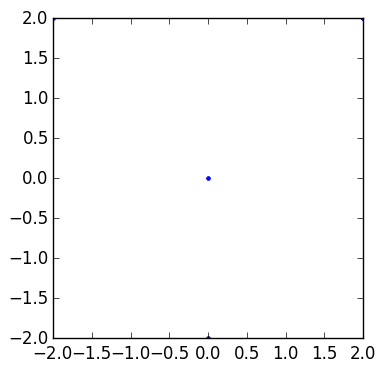

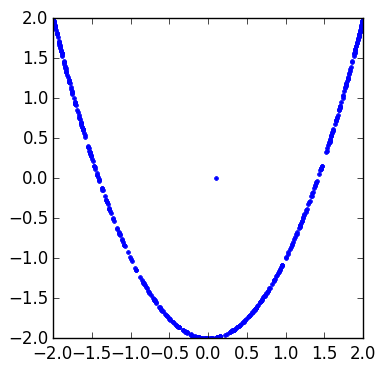

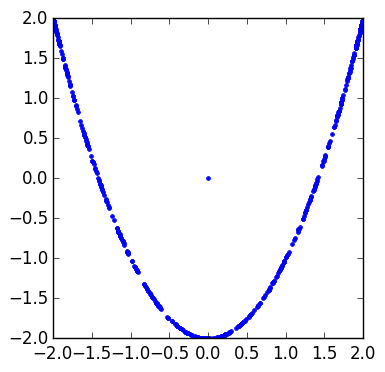

In [9]:
#Se corren las animaciones para cada una
anima_plot(x0,y0,"parabola_0.0") 
anima_plot(x01,y01,"parabola_0.1")
anima_plot(x0001,y0001,"parabola_0.001")
muestra_animacion("parabola_0.0")
muestra_animacion("parabola_0.1")
muestra_animacion("parabola_0.001")

**Ejercicio 2:** Escriban una función que, con los argumentos `F` para el mapeo, `x0` para la condición inicial y `n` para el número de iterados del mapeo (un número entero), genere los `n` iterados del mapeo y haga el análisis gráfico descrito del mapeo. Ilustren el funcionamiento con $F(x)=\sqrt{x}$.

Ahora vamos a estar trabajando con `Plots` así qúe limpiamos el área de trabajo.

In [10]:
workspace()

In [12]:
using Plots, PlotRecipes
using LaTeXStrings
pyplot()

Plots.PyPlotBackend()

Creamos la función genral de mapeos que recibe cualquier función y regresa dos vectores, que juntos marcan el trayecto 
de la iteración.

In [13]:
L"""
`Fmapeos` recibe una función $F(x)$ a la cuál será aplicada la iteración $x=F(x)$. La función regresa dos vectores, 
que juntos trazan el trayecto de la iteración.
"""
function Fmapeos(F::Function,x::Float64,n::Int)
    xpath=Float64[x]
    ypath=Float64[0.0]
    for i in 1:n
        push!(xpath,x)     
        x = F(x)
        push!(ypath,x)     #Hasta acá es la misma función que sqrt_mapeos
        
        push!(xpath,x)     #Se agregan estas dos líneas para que entre cada punto sobre la gráfica, 
                           #haya un punto sobre la identidad
        push!(ypath,x)
    end
    return xpath,ypath
    
end


Fmapeos (generic function with 1 method)

In [14]:
L"""
`Fmapeo_graph` recibe una función $F(x)$ a la cual opera `Fmapeos` y en seguida grafíca con `Plots` a $F(x), x $
y a los vectores resultantes de `Fmapeos` después de 100 iteraciones. Es necesario especificar la semilla y los 
rangos de graficación
"""

function Fmapeo_graph(F::Function,seed::Float64,rangoxi::Float64,rangoxf::Float64,rangoyi::Float64,rangoyf::Float64)

    x0,y0=Fmapeos(x->F(x),seed,100) #Se oprea Fmapeos y se guardan los vectores de salida

    rangox = rangoxi:1/32:rangoxf   #Se especifica el rango para graficar
    
    plot(rangox, x->F(x),           #Se grafica a F(x)
    xaxis=(L"x", (rangoxi,rangoxf), rangoxi:rangoxf), 
    yaxis=((rangoyi, rangoyf), L"F(x)"), 
    legend=false, title=L"$F(x)= F(x)$", grid=false) #El título va ligado a F(x) 
    
    plot!(rangox, x->x, color=:red) #Se grafica la identidad

    plot!(x0, y0, #Se grafican los vectores
line=(:green, :path, 2.0, :dot), marker=(:point, 0.5))

end

Fmapeo_graph (generic function with 1 method)

Se usa la función $\sqrt x$ con semilla `0.5`

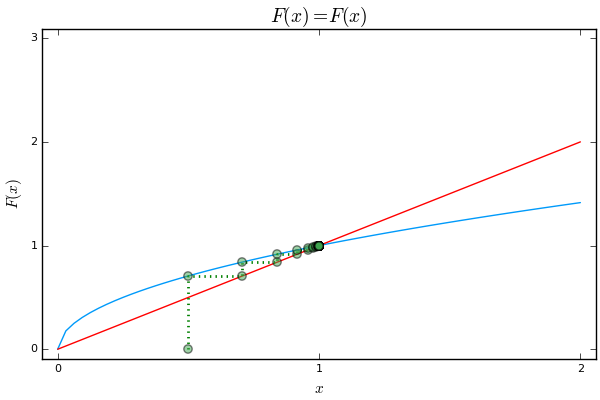

In [18]:
Fmapeo_graph(x->sqrt(x),0.5,0.0,2.0,0.0,3.0)

Podemos observar cómo $x=1$ es un punto al cual las iteraciones convergen.}


**Ejercicio 3:** 

Usen el análisis para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. 

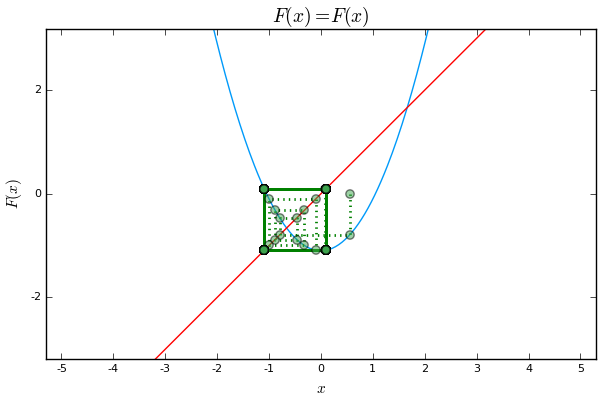

In [20]:
seed = 2*rand() #Una semilla aleatoria entre 0 y 2
Fmapeo_graph(x->x^2-1.1,seed,-5.0,5.0,-3.0,3.0) 

Vemos que con cualquie semilla menor a 2, se cae en un ir y venir, una órbita, entre dos valores. Tiene forma cuadrada en la gráfica ya que entre cada valor se incluye el punto de éste sobre la identidad. Ya que esto es determinista, agarramos la misma semilla que se usó para la gráfica y observamos los últimos valores de cualquiera de los dos vectores, en este caso, de x.

In [21]:
x0,y0=Fmapeos(x->x^2-1.1,seed,100)
println(x0[end-10:2:end]) #Se salta el valor de enmedio porque está repetido

[-1.0916079783099617,0.0916079783099617,-1.0916079783099617,0.0916079783099617,-1.0916079783099617,0.0916079783099617]


Vemos que los valores repetidos son `-1.0916079783099617` y `0.0916079783099617`

**Ejercicio 4:**

Hagan un análisis completo de las posibles órbitas de los siguientes mapeos, usando distintos colores para distintas órbitas. Interesa entre otras cosas saber cuántos puntos fijos tiene y cómo es la dinámica cerca de ésos puntos.

1. $F_1(x) = \frac{1}{3x}$.

2. $F_2(x) = -\frac{x^5}{5}$.

3. $F_3(x) = \frac{x}{2}-2$.

Definimos las funciones que tenemos que analizar

In [23]:
F1(x) = 1/(3x)
F2(x) = -(x^5)/5
F3(x) = x/2 -2

F3 (generic function with 1 method)

Graficamos como en el problema anterior. Se incluyen trayectos adicionales con otras semillas para mostrar mejor el comportamiento de las órbitas.

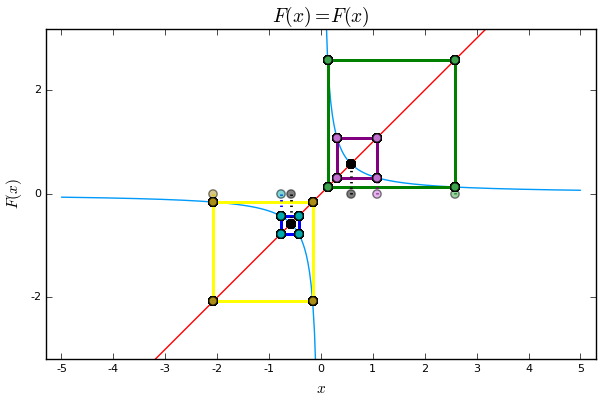

In [24]:

Fmapeo_graph(x->F1(x),sqrt(1/3)+2,-5.0,5.0,-3.0,3.0) 

x0,y0=Fmapeos(x->F1(x),sqrt(1/3)+0.5,100)
plot!(x0, y0, 
line=(:purple, :path, 2.0, :dot), marker=(:point, 0.5))

x1,y1=Fmapeos(x->F1(x),-sqrt(1/3)-1.5,100)
plot!(x1, y1, 
line=(:yellow, :path, 2.0, :dot), marker=(:point, 0.5))

x2,y2=Fmapeos(x->F1(x),-sqrt(1/3)-0.2,100)
plot!(x2, y2, 
line=(:blue, :path, 2.0, :dot), marker=(:point, 0.5))

x3,y3=Fmapeos(x->F1(x),sqrt(1/3),100)
plot!(x3, y3, 
line=(:black, :path, 2.0, :dot), marker=(:black,:point, 0.5))
x4,y4=Fmapeos(x->F1(x),-sqrt(1/3),100)
plot!(x4, y4, 
line=(:black, :path, 2.0, :dot), marker=(:black,:point, 0.5))

Vemos cómo donde sea que se coloque la semilla, se generarán órbitas de periodo 2. Esto se debe a la simetría de la función con respecto a la identidad. También vemos cómo las órbitas convergen a las raíces de la funcion $x=F1(x)$, $x=\pm\frac{1}{\sqrt3}$ y estos valores son puntos fijos.

Vemos como en las siguientes dos funciones se conserva que las raíces son puntos fijos de la iteración.

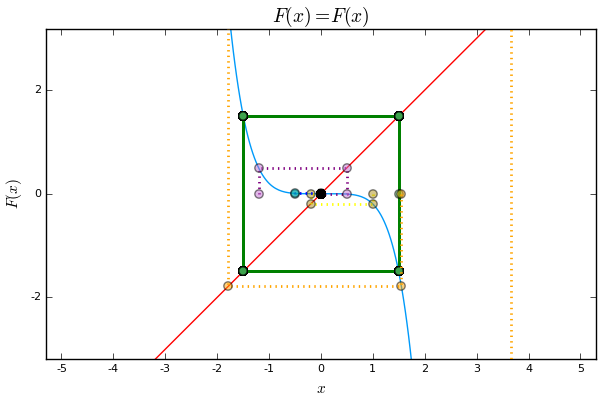

In [35]:
Fmapeo_graph(x->F2(x),sqrt(sqrt(5)),-5.0,5.0,-3.0,3.0)

x0,y0=Fmapeos(x->F2(x),-1.2,100)
plot!(x0, y0, 
line=(:purple, :path, 2.0, :dot), marker=(:point, 0.5))

x1,y1=Fmapeos(x->F2(x),1.0,100)
plot!(x1, y1, 
line=(:yellow, :path, 2.0, :dot), marker=(:point, 0.5))

x2,y2=Fmapeos(x->F2(x),-0.5,100)
plot!(x2, y2, 
line=(:blue, :path, 2.0, :dot), marker=(:point, 0.5))

x3,y3=Fmapeos(x->F2(x),1.55,100)
plot!(x3, y3, 
line=(:orange, :path, 2.0, :dot), marker=(:orange,:point, 0.5))

x4,y4=Fmapeos(x->F2(x),0.0,100)
plot!(x4, y4, 
line=(:black, :path, 2.0, :dot), marker=(:black,:point, 0.5))


Acá las órbitas se encuentran en las raíces de $F(x)$ que no son intersectadas por la identidad. Fuera de la órbita las semillas divergen, y dentro, convergen a 0.

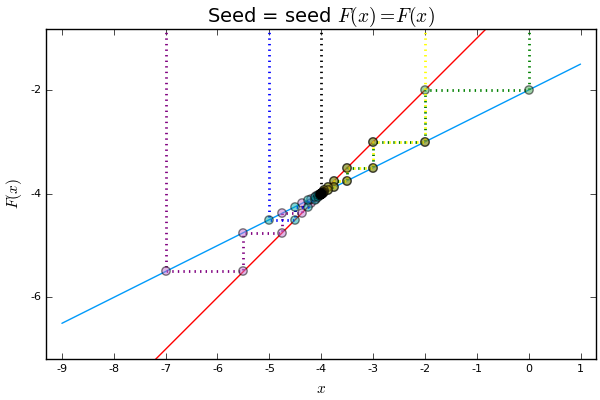

In [26]:
Fmapeo_graph(x->F3(x),-4.0+4,-9.0,1.0,-7.0,-1.0)

x0,y0=Fmapeos(x->F3(x),-4.0-3,100)
plot!(x0, y0, 
line=(:purple, :path, 2.0, :dot), marker=(:point, 0.5))

x1,y1=Fmapeos(x->F3(x),-4.0+2,100)
plot!(x1, y1, 
line=(:yellow, :path, 2.0, :dot), marker=(:point, 0.5))

x2,y2=Fmapeos(x->F3(x),-4.0-1,100)
plot!(x2, y2, 
line=(:blue, :path, 2.0, :dot), marker=(:point, 0.5))

x3,y3=Fmapeos(x->F3(x),-4.0,100)
plot!(x3, y3, 
line=(:black, :path, 2.0, :dot), marker=(:black,:point, 0.5))


Acá no hay órbitas, y vemos cómo de ambos lados del punto fijo, habrá atracción. Además de que esta atracción no está limitada en rango como en la función anterior.

**Ejercicio 5:**

Para el mapeo mismo mapeo $F(x) = x^2-2$ en el intervalo $[-2,2]$
(ejercicio 1), consideren un punto al azar en el intervalo $[-2,2]$ y construyan una órbita muy larga, por ejemplo, de 20,000 iterados. Obtengan el histograma de frecuencia de visita de los puntos de la órbita. ¿Qué conclusión podemos sacar de este histograma?

In [33]:
function histoF(n::Int,x::Float64)
    
    for i in 1:n
        x = x^2-2
    end
    return x
end


histoF (generic function with 1 method)

In [34]:
y = [histoF(k,2*rand()) for k in 1:20000];

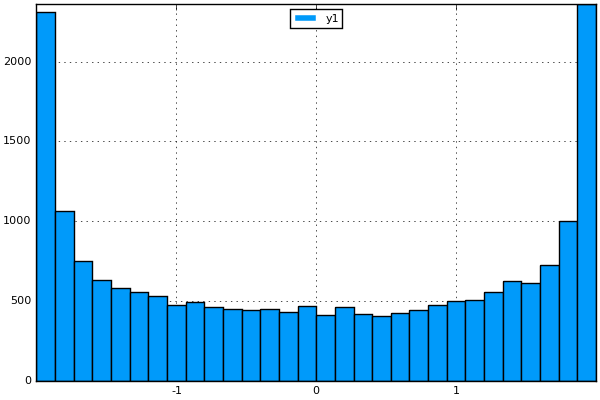

In [35]:
histogram(y)

**Ejercicio 6:**

Analicen los mapeos

- F(x) = x^2,

- F(x) = x^3,

- F(x) = -x^3,

que se satisface $F(0) = F'(0) = 0$.

In [36]:
F4(x) = x^2
F5(x) = x^3
F6(x) = -x^3

F6 (generic function with 1 method)

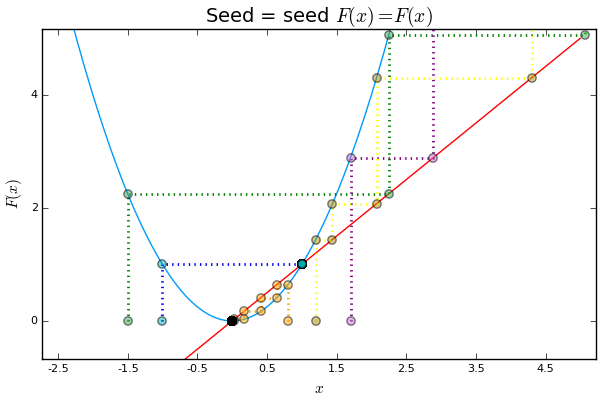

In [52]:
Fmapeo_graph(x->F4(x),-1.5,-2.5,5.0,-0.5,5.0)

x0,y0=Fmapeos(x->F4(x),1.7,100)
plot!(x0, y0, 
line=(:purple, :path, 2.0, :dot), marker=(:point, 0.5))

x1,y1=Fmapeos(x->F4(x),1.2,100)
plot!(x1, y1, 
line=(:yellow, :path, 2.0, :dot), marker=(:point, 0.5))

x2,y2=Fmapeos(x->F4(x),-1.0,100)
plot!(x2, y2, 
line=(:blue, :path, 2.0, :dot), marker=(:point, 0.5))

x3,y3=Fmapeos(x->F4(x),0.8,100)
plot!(x3, y3, 
line=(:orange, :path, 2.0, :dot), marker=(:orange,:point, 0.5))

x3,y3=Fmapeos(x->F4(x),0.0,100)
plot!(x3, y3, 
line=(:black, :path, 2.0, :dot), marker=(:black,:point, 0.5))


Acá hay dos puntos fijos, `0.0` y `1.0`. Vemos cómo hay un alternado entre atracción y repulsión. Es importante notar que `-1.0` es un punto semi fijo, ya que a tan solo una iteración llega a `1.0` y se fija. Entonces, $x<-1$ diverge, $1>x>-1$ atractor a `0.0` y $x>1$ diverge.

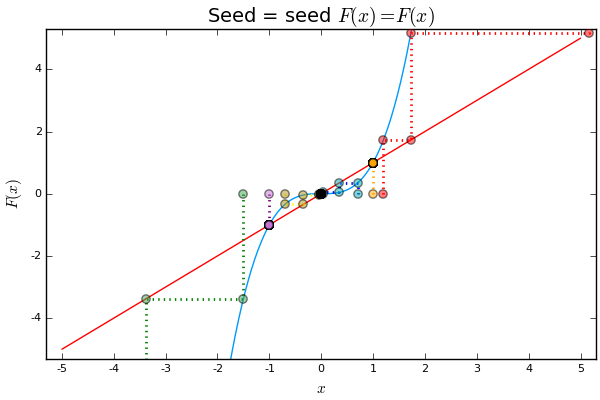

In [59]:
Fmapeo_graph(x->x^3,-1.5,-5.0,5.0,-5.0,5.0)

x0,y0=Fmapeos(x->F5(x),-1.0,100)
plot!(x0, y0, 
line=(:purple, :path, 2.0, :dot), marker=(:point, 0.5))

x1,y1=Fmapeos(x->F5(x),-0.7,100)
plot!(x1, y1, 
line=(:yellow, :path, 2.0, :dot), marker=(:point, 0.5))

x2,y2=Fmapeos(x->F5(x),0.7,100)
plot!(x2, y2, 
line=(:blue, :path, 2.0, :dot), marker=(:point, 0.5))

x3,y3=Fmapeos(x->F5(x),1.0,100)
plot!(x3, y3, 
line=(:orange, :path, 2.0, :dot), marker=(:orange,:point, 0.5))

x3,y3=Fmapeos(x->F5(x),1.2,100)
plot!(x3, y3, 
line=(:red, :path, 2.0, :dot), marker=(:red,:point, 0.5))

x3,y3=Fmapeos(x->F5(x),0.0,100)
plot!(x3, y3, 
line=(:black, :path, 2.0, :dot), marker=(:black,:point, 0.5))

Para esta función, tenemos la misma distribución de puntos divergentes y atractores. Sin embargo, acá $-1$ sí es un raíz, punto fijo real. También vemos cómo los puntos menores a $-1$ divergen hacia $-\inf$ y los puntos $[-1,0]$ se acercan a $0$ por la izquierda.

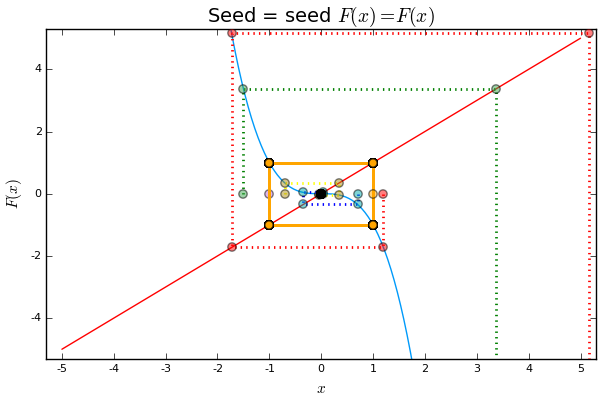

In [60]:
Fmapeo_graph(x->-x^3,-1.5,-5.0,5.0,-5.0,5.0)

x0,y0=Fmapeos(x->F6(x),-1.0,100)
plot!(x0, y0, 
line=(:purple, :path, 2.0, :dot), marker=(:point, 0.5))

x1,y1=Fmapeos(x->F6(x),-0.7,100)
plot!(x1, y1, 
line=(:yellow, :path, 2.0, :dot), marker=(:point, 0.5))

x2,y2=Fmapeos(x->F6(x),0.7,100)
plot!(x2, y2, 
line=(:blue, :path, 2.0, :dot), marker=(:point, 0.5))

x3,y3=Fmapeos(x->F6(x),1.0,100)
plot!(x3, y3, 
line=(:orange, :path, 2.0, :dot), marker=(:orange,:point, 0.5))

x3,y3=Fmapeos(x->F6(x),1.2,100)
plot!(x3, y3, 
line=(:red, :path, 2.0, :dot), marker=(:red,:point, 0.5))

x3,y3=Fmapeos(x->F6(x),0.0,100)
plot!(x3, y3, 
line=(:black, :path, 2.0, :dot), marker=(:black,:point, 0.5))

Similar a $F2(x)$, tenemos un orbital en la raiz que no interecta la identidad. Fuera del orbital las iteraciones divergen y dentro, convergen a 0.

**Ejercicio 7:**

Analicen los mapeos

- F(x) = x,

- F(x) = -x,

- F(x) = x-x^2,

que se satisface $F(0) = 0$ y $|F'(0)| = 1$. (Este tipo de puntos son *neutralmente* atractivos o repulsivos.

In [61]:
F7(x)=x
F8(x)=-x
F9(x)=x-x^2

F9 (generic function with 1 method)

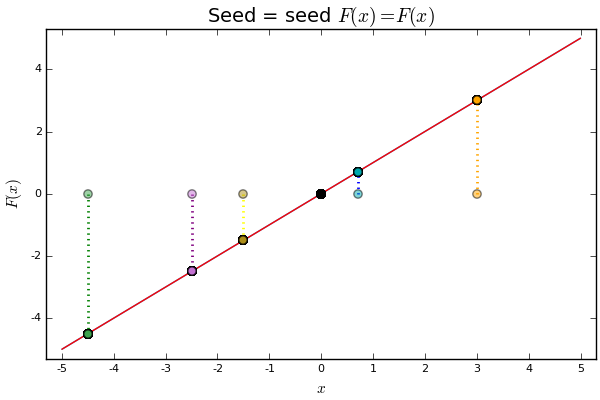

In [80]:
Fmapeo_graph(x->F7(x),-4.5,-5.0,5.0,-5.0,5.0)

x0,y0=Fmapeos(x->F7(x),-2.5,100)
plot!(x0, y0, 
line=(:purple, :path, 2.0, :dot), marker=(:point, 0.5))

x1,y1=Fmapeos(x->F7(x),-1.5,100)
plot!(x1, y1, 
line=(:yellow, :path, 2.0, :dot), marker=(:point, 0.5))

x2,y2=Fmapeos(x->F7(x),0.7,100)
plot!(x2, y2, 
line=(:blue, :path, 2.0, :dot), marker=(:point, 0.5))

x3,y3=Fmapeos(x->F7(x),3.0,100)
plot!(x3, y3, 
line=(:orange, :path, 2.0, :dot), marker=(:orange,:point, 0.5))

x3,y3=Fmapeos(x->F7(x),0.0,100)
plot!(x3, y3, 
line=(:black, :path, 2.0, :dot), marker=(:black,:point, 0.5))

En este caso todo los puntos de la función son puntos fijos, ya que todo número cumple que x=x. Ya que todos los puntos son fijos, no hay atracción ni repulsión hacia 0.

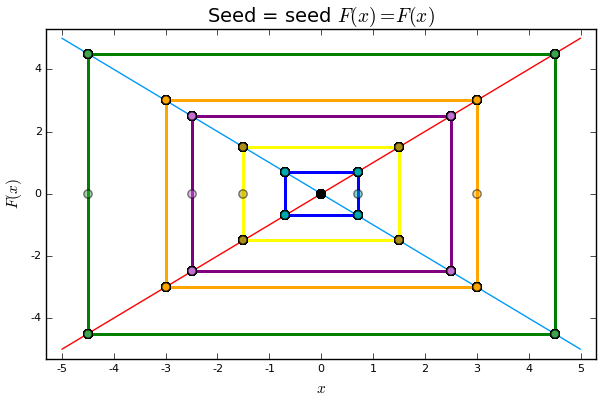

In [79]:
Fmapeo_graph(x->F8(x),-4.5,-5.0,5.0,-5.0,5.0)

x0,y0=Fmapeos(x->F8(x),-2.5,100)
plot!(x0, y0, 
line=(:purple, :path, 2.0, :dot), marker=(:point, 0.5))

x1,y1=Fmapeos(x->F8(x),-1.5,100)
plot!(x1, y1, 
line=(:yellow, :path, 2.0, :dot), marker=(:point, 0.5))

x2,y2=Fmapeos(x->F8(x),0.7,100)
plot!(x2, y2, 
line=(:blue, :path, 2.0, :dot), marker=(:point, 0.5))

x3,y3=Fmapeos(x->F8(x),3.0,100)
plot!(x3, y3, 
line=(:orange, :path, 2.0, :dot), marker=(:orange,:point, 0.5))

x3,y3=Fmapeos(x->F8(x),0.0,100)
plot!(x3, y3, 
line=(:black, :path, 2.0, :dot), marker=(:black,:point, 0.5))

Para esta función, todos los puntos de la recta formas órbitas de periodo 2. Vemos que esta función cumple la simetría con la identidad que vimos en $F1(x)$. Similarmente, vemos cómo las órbitas están centradas en la raíz, a pesar de que las semillas no sean ataídas ni repulsadas.

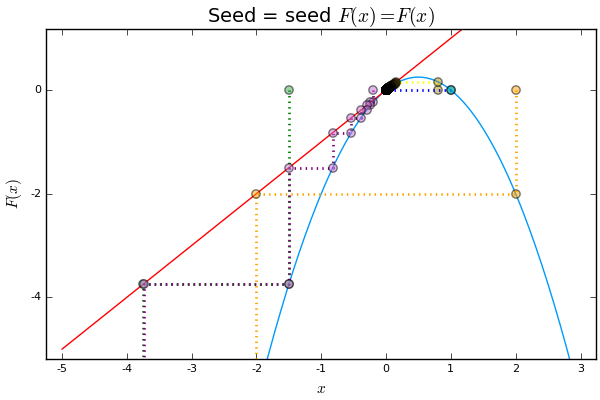

In [73]:
Fmapeo_graph(x->F9(x),-1.5,-5.0,3.0,-5.0,1.0)

x0,y0=Fmapeos(x->F9(x),-0.2,100)
plot!(x0, y0, 
line=(:purple, :path, 2.0, :dot), marker=(:point, 0.5))

x1,y1=Fmapeos(x->F9(x),0.8,100)
plot!(x1, y1, 
line=(:yellow, :path, 2.0, :dot), marker=(:point, 0.5))

x2,y2=Fmapeos(x->F9(x),1.0,100)
plot!(x2, y2, 
line=(:blue, :path, 2.0, :dot), marker=(:point, 0.5))

x3,y3=Fmapeos(x->F9(x),2.0,100)
plot!(x3, y3, 
line=(:orange, :path, 2.0, :dot), marker=(:orange,:point, 0.5))

x3,y3=Fmapeos(x->F9(x),0.0,100)
plot!(x3, y3, 
line=(:black, :path, 2.0, :dot), marker=(:black,:point, 0.5))


Finalmente, en esta función tenemos un pseudo punto fijo en $x=1$ que marca un intervalo convergente de semillas en $[0,1]$. Fuera de este intervalo, todas las semillas divergen.